In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df = pd.read_csv(r"C:\\Users\\Krishna Baraskar\\Downloads\\economic_index.csv")
df.head()

,year,month,interest_rate,unempolyment_rate,index_price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256


In [40]:
# Drop unnessesory columns
df.drop(columns=["year","month"],axis=1,inplace=True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   interest_rate      24 non-null     float64
 1   unempolyment_rate  24 non-null     float64
 2   index_price        24 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 708.0 bytes


In [42]:
df.isnull().sum()

interest_rate        0
unempolyment_rate    0
index_price          0
dtype: int64

In [43]:
df.corr()

,interest_rate,unempolyment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unempolyment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop("index_price",axis=1),df["index_price"],test_size = 0.2)

In [45]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((19, 2), (5, 2), (19,), (5,))

<Axes: xlabel='interest_rate', ylabel='index_price'>

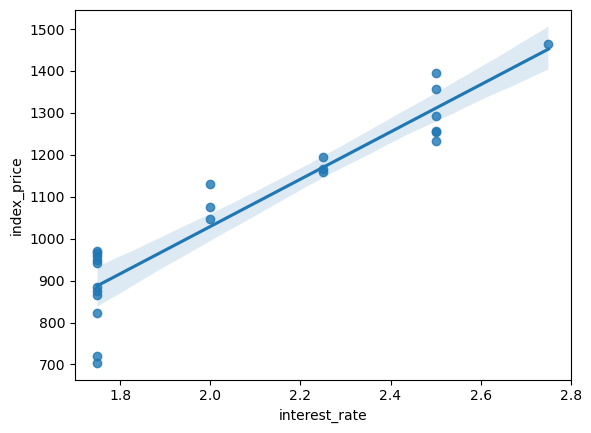

In [46]:
sns.regplot(x = df["interest_rate"],y = df["index_price"])

<Axes: xlabel='interest_rate', ylabel='unempolyment_rate'>

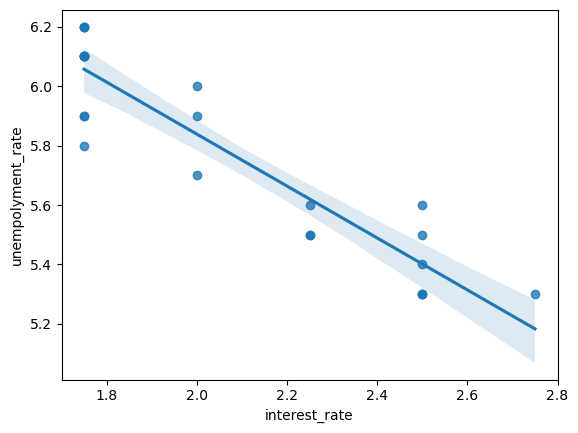

In [47]:
sns.regplot(x = df["interest_rate"],y = df["unempolyment_rate"])

<Axes: xlabel='index_price', ylabel='unempolyment_rate'>

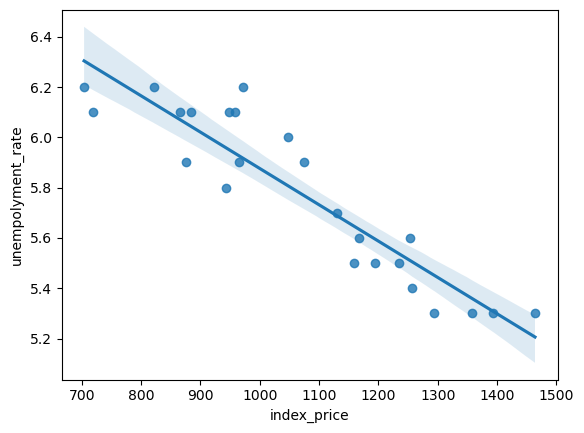

In [48]:
sns.regplot(x = df["index_price"],y = df["unempolyment_rate"])

In [49]:
# Standardization

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [50]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [51]:
# Cross Validation
from sklearn.model_selection import cross_val_score
val_score = cross_val_score(reg,x_train,y_train,scoring="neg_mean_squared_error",cv = 3)

In [52]:
np.mean(val_score)

-7110.359931709902

In [53]:
# Prediction
y_pred = reg.predict(x_test)
y_pred

array([ 851.05706338, 1210.55401849, 1343.97097963,  974.60777385,
       1415.61258552])

In [54]:
# Performance Matrix
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [55]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2_score_ = r2_score(y_test,y_pred)

print("mae :",mae)
print("mse :",mse)
print("rmse :",rmse)
print("r2_score_ :",r2_score_)

mae : 42.3154499661681
mse : 1888.1127534153916
rmse : 43.452419419583435
r2_score_ : 0.9648535935535625


**Assuptions**

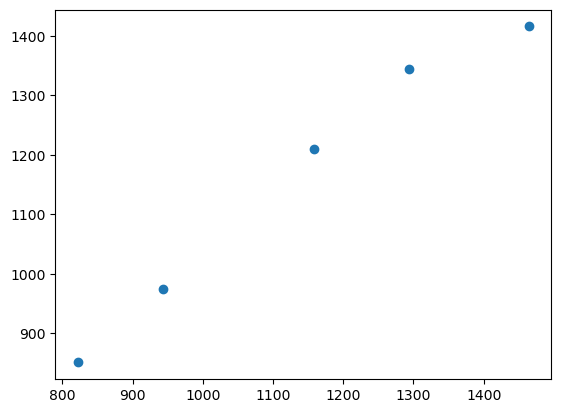

In [56]:
plt.scatter(y_test,y_pred)
# graph show any patarn then program is good

In [57]:
errors = y_test-y_pred
errors

21   -29.057063
8    -51.554018
3    -50.970980
14   -31.607774
0     48.387414
Name: index_price, dtype: float64

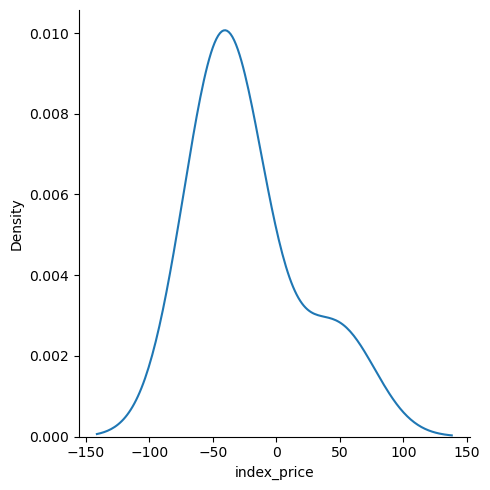

In [58]:
sns.displot(errors,kind="kde")
# graph show any patarn then program is good

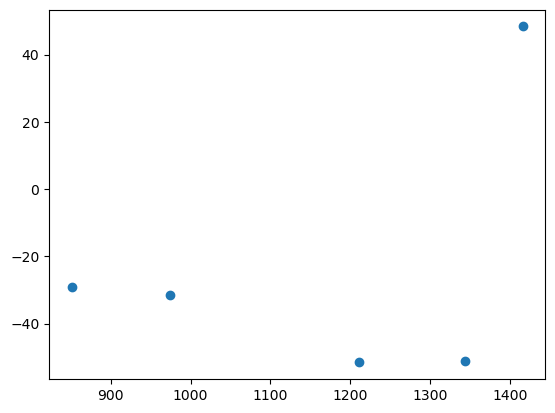

In [59]:
# Scatter plot with respect to prediction and errors
plt.scatter(y_pred,errors)
# if prediction and errors don't shows pattern then not problem in code